# Data Cleaning (pandas & regex)

In [12]:
import pandas as pd
import re

#load in data from csv
audible = pd.read_csv("audible.csv", encoding='utf-8')

audible.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,4-8-2008,English,5 out of 5 stars34 ratings,468
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,1-5-2018,English,4.5 out of 5 stars41 ratings,820
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,6-11-2020,English,4.5 out of 5 stars38 ratings,410
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,5-10-2021,English,4.5 out of 5 stars12 ratings,615
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,1-13-2010,English,4.5 out of 5 stars181 ratings,820
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,2-5-2017,English,5 out of 5 stars50 ratings,820
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,2-5-2017,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrantâ€™s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820


In [13]:
# beginning with author and narrator cols.

# removing 'Writtenby' header and adding a space between names if multiple are listed
audible['author'] = audible['author'].str.replace("Writtenby:", "", regex = False).str.replace(",", ", ")

# removing 'Narratedby' header and adding a space between names if multiple are listed
audible['narrator'] = audible['narrator'].str.replace("Narratedby:", "", regex = False).str.replace(",", ", ")

# will change values from 'Writtenby:JohnDoe,JaneDoe' to 'JohnDoe, JaneDoe'

In [14]:
# next, adding spaces between an author's first and last names:

# 1. adds a space when there is a lowercase letter followed by a capital letter
audible['author'] = audible['author'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)
# 2. adds a space when there is a period followed by a capital letter
audible['author'] = audible['author'].str.replace(r'(\.)([A-Z])', r'\1 \2', regex=True)
        

# apply same changes to narrator column:  
audible['narrator'] = audible['narrator'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)
audible['narrator'] = audible['narrator'].str.replace(r'(\.)([A-Z])', r'\1 \2', regex=True)

# 1. will change values from 'JohnDoe, JaneDoe' to 'John Doe, Jane Doe'
# 2. will change values from 'John A.Doe, Jane B.Doe' to 'John A. Doe, Jane B. Doe'

In [21]:
# now looking at time duration column:
# we want to change the format to H:MM

# define function to do so
def string_to_time(x):
    
    # first, search for whether a time has an hour/hours value:
    hour = re.search("(\d*)\shr", x) # searches a string for '(number) hr', where (number) is a captured group

    if hour == None:

        hour = "0" # define hour value as 0 if no match was found (i.e. the time is less than one hour)

    else:

        hour = hour.group(1) # returns captured group, ex. the match '3 hrs' returns '3'

    # now, search for whether a time has a minute/minutes value:
    mins = re.search("(\d*)\smin", x) # searches a string for '(number) min', where (number) is a captured group

    if mins == None:

        mins = "00" # define minute value as 0 if no match found (i.e. the time is exactly _ hour/s)

    else:

        mins = mins.group(1) # returns captured group, ex. the match '15 mins' returns '15'

        if len(mins) == 1:

            mins = "0" + mins # if single digit minutes value, add a zero in front to keep H:MM format

        else:

            pass

    time = hour + ":" + mins # finally, combine hour and mins values to obtain time in the format H:MM

    return time

In [22]:
# apply above function on 'time' column to convert all data to desired format
audible['time'] = audible['time'].apply(string_to_time)

In [6]:
# next, looking at release date column
# we want all values to be in the format YYYY-MM-DD
# note that values are given in two different formats, M-D-YYYY and DD-MM-YY


# define function to achieve YYYY-MM-DD format:
def string_to_date(x):

    search = re.search(r"\d*-\d*-\d{4}", x) # searches for string with ##-##-#### (M-D-YYYY) format

    if search != None: # returned a match, so date is currently in M-D-YYYY format

        value = search.group() # extracts date string match found

        split = re.split("-", value) # splits 'M-D-YYYY' into list ['M', 'D', 'YYYY']
        
        day = split[1] # assign day as D
            
        month = split[0] # assign month as M
          
        year = split[2] # assign year as YYYY

    else: # did not return match, so date must currently have DD-MM-YY format

        split = re.split("-", x) # splits 'DD-MM-YY' into list ['DD', 'MM', 'YY']
        
        day = split[0] # assigns day as DD
        
        month = split[1] # assigns month as MM

        year = split[2] # assigns year as YY

        if int(year) > 25: # use conditional to check century

            year = "19" + year # YY -> 19YY

        else:

            year = "20" + year # YY -> 20YY
        
    if len(day) == 1:
            
            day = "0" + day # add 0 infront of single digit date to ensure DD format
            
    if len(month) == 1:
            
            month = "0" + month # add 0 infront of single digit month to ensure MM format
            
    date = year + "-" + month + "-" + day # finally, combine year, month, and day values in YYYY-MM-DD format
            
    return date

In [7]:
# apply above function on 'releasedate' column to convert all data to desired format
audible['releasedate'] = audible['releasedate'].apply(string_to_date)

In [8]:
# next, looking at language column

# print all unique values to look for spelling/other gramatical issues
audible['language'].unique()

# notice that almost all values should be capitalized
# also, 'mandarin_chinese' needs to be corrected

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [9]:
audible['language'] = audible['language'].str.capitalize() # capitalizes all language values

audible['language'] = audible['language'].str.replace("Mandarin_chinese", "Mandarin Chinese") # value replacement 

audible['language'].unique() # looks good now!

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin Chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

In [10]:
# next, looking at stars column, containing info on audiobook ratings and # of reviews recieved
# we want to split this information into 2 separate columns, rating and number of reviews


# define function to extract both desired values:
def get_ratings_reviews(x): # input is a string of the form '_ out of 5 stars# ratings' or 'Not rated yet'
    
    if x == "Not rated yet": 
        
        rating = "NA" 
        
        num_reviews = 0 # no rating = zero reviews

    else:
        
        split = re.split(" ", x) # splits input into list ['_', 'out', 'of', 'stars#', 'ratings']

        rating = float(split[0]) # assign rating as _ value, ex. 4.5 or 5.0

        num_reviews = split[4][5:] # extract number value from 'stars#'
        
        num_reviews = int(re.sub(",", "", num_reviews)) # remove commas from '#', then change type to integer

    return rating, num_reviews # return tuple with rating and number of reviews

In [11]:
# testing function:

x = '4.5 out of 5 stars34 ratings'

get_ratings_reviews(x)

(4.5, 34)

In [341]:
# apply above function to stars column, modifying the 'stars' rating column and adding a new num_reviews column
audible[['stars', 'num_reviews']] = audible['stars'].apply(get_ratings_reviews).apply(pd.Series)

In [342]:
# finally, we will look at the price column
# we want any books priced as 'Free' to be listed as zero
# this is so that we can later apply numeric operations, if we wish to, or accurately view the price distribution

def price_correction(x): # input is a string of the form '#', '#.00', or 'Free'
    
    if x == 'Free':
        
        price = 0
        
    else:
        
        price = re.sub(r"\.\d{2}", "", x) # remove '.00' from the price
        
        price = int(re.sub(",", "", price)) # remove any commas from the price, then change type to integer 
        
    return price

In [343]:
# apply above function to price column to convert all data to desired format
audible['price'] = audible['price'].apply(price_correction)

In [344]:
audible.head() # our table looks much better now!

,name,author,narrator,time,releasedate,language,stars,price,num_reviews
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2:20,2008-04-08,English,5.0,468,34.0
1,The Burning Maze,Rick Riordan,Robbie Daymond,13:08,2018-01-05,English,4.5,820,41.0
2,The Deep End,Jeff Kinney,Dan Russell,2:03,2020-06-11,English,4.5,410,38.0
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11:16,2021-05-10,English,4.5,615,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10:00,2010-01-13,English,4.5,820,181.0


## Note about foreign titles:

For books/audiobooks that are not in English, many of their titles, authors, and narrators are written in their foreign language and thus contain special characters. Despite reading the data with UTF-8 encoding, I was unable to have these foreign titles with foreign characters displayed correctly, and they instead appear as different special characters and look as though they are corrupted data. Due to this issue, any non-English titles, authors, or narrators that appear in the analysis section below will be shown in this way.

# Exploratory Analysis

In [345]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/dc/_ptr38kd2gv_8py8p0scnjfh0000gn/T/ipykernel_39875/1140358328.py:14: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
/Users/noahrini/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


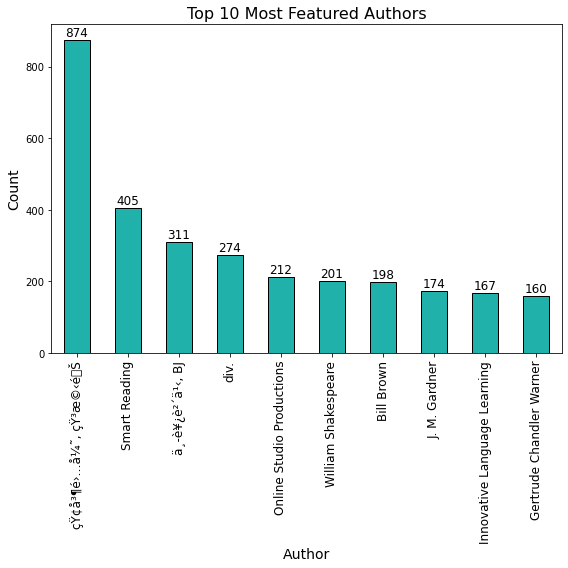

In [361]:
# TOP 10 MOST FEATURED AUTHORS:

author_counts = audible['author'].value_counts().head(10) # top 10 most featured authors

plt.figure(figsize = (8, 8))

author_counts.plot(kind = 'bar', color = 'lightseagreen', edgecolor = 'black') # using bar plot

for index, value in enumerate(author_counts):
    plt.text(index, value + 10, str(value), ha = 'center', fontsize = 12) # creating text above each bar

plt.title('Top 10 Most Featured Authors', fontsize = 16)
plt.xlabel('Author', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.tight_layout()

plt.show()

/var/folders/dc/_ptr38kd2gv_8py8p0scnjfh0000gn/T/ipykernel_39875/4023943883.py:13: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
/Users/noahrini/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


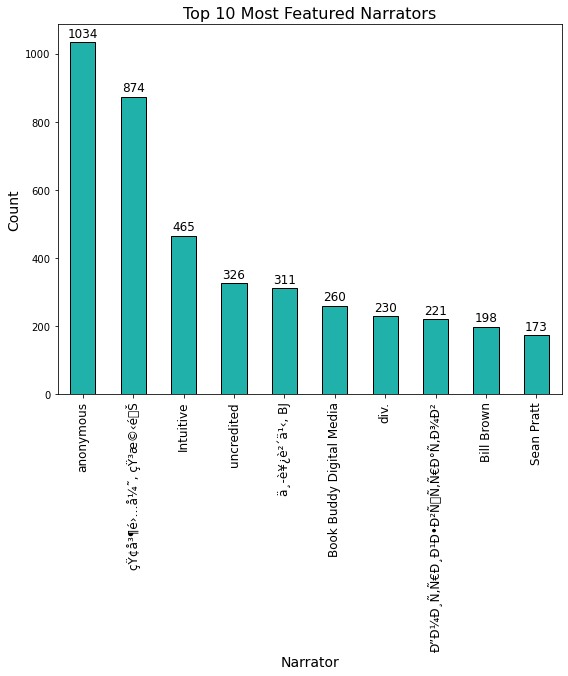

In [362]:
# TOP 10 MOST FEATURED NARRATORS:

narrator_counts = audible['narrator'].value_counts().head(10) # top 10 most featured narrators

plt.figure(figsize = (8, 9.5))

narrator_counts.plot(kind = 'bar', color = 'lightseagreen', edgecolor = 'black') # using bar plot

for index, value in enumerate(narrator_counts):
    plt.text(index, value + 15, str(value), ha = 'center', fontsize = 12) # creating text above each bar

plt.title('Top 10 Most Featured Narrators', fontsize = 16)
plt.xlabel('Narrator', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.tight_layout()

plt.show()

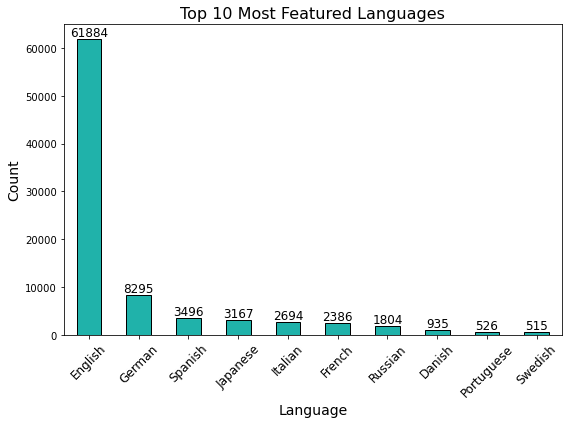

In [363]:
# TOP 10 MOST FEATURED LANGUAGES:

language_counts = audible['language'].value_counts().head(10) # top 10 most featured languages

plt.figure(figsize = (8, 6))

language_counts.plot(kind = 'bar', color = 'lightseagreen', edgecolor = 'black') # using bar plot

for index, value in enumerate(language_counts):
    plt.text(index, value + 600, str(value), ha = 'center', fontsize = 12) # creating text above each bar

plt.title('Top 10 Most Featured Languages', fontsize = 16)
plt.xlabel('Language', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.tight_layout()

plt.show()

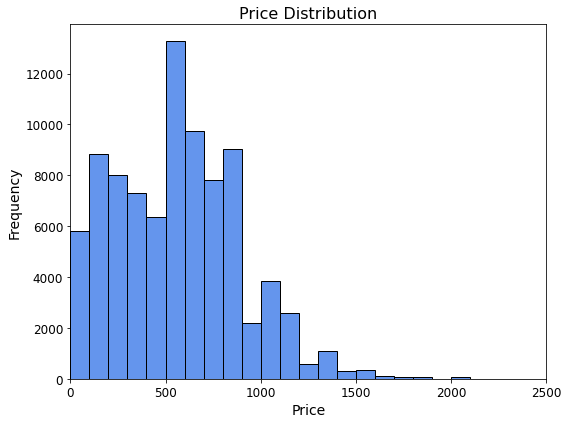

In [355]:
# AUDIOBOOK PRICE DISTRIBUTION:

plt.figure(figsize = (8, 6))

bins = np.arange(0, 2500, 100) # want bins to be positioned every 100 units

plt.hist(audible['price'], bins = bins, color = 'cornflowerblue', edgecolor = 'black') # using histogram plot


plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0, 2500)
plt.tight_layout()

plt.show()

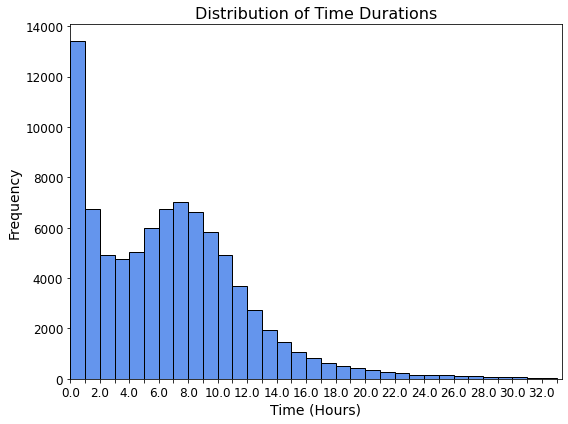

In [356]:
# AUDIOBOOK TIME DURATION DISTRIBUTION:

# create a function to convert H:MM time durations into a continuous minutes scale
def convert_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# apply above function to the time duration column to obtain the data needed
times = audible['time'].apply(convert_to_minutes)

plt.figure(figsize = (8, 6))

bins = np.arange(0, 2000, 60) # want bins to be positioned every 60 minutes/1 hour

plt.hist(times, bins = bins, color ='cornflowerblue', edgecolor = 'black') # using histogram plot

# want to label every other xtick in terms of hours, instead of minutes
bin_labels_in_hours = [f"{b / 60}" if i % 2 == 0 else '' for i, b in enumerate(bins)]

plt.xticks(bins, bin_labels_in_hours, fontsize = 12)

plt.title('Distribution of Time Durations', fontsize = 16)
plt.xlabel('Time (Hours)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.yticks(fontsize = 12)
plt.xlim(0, 2000)
plt.tight_layout()

plt.show()

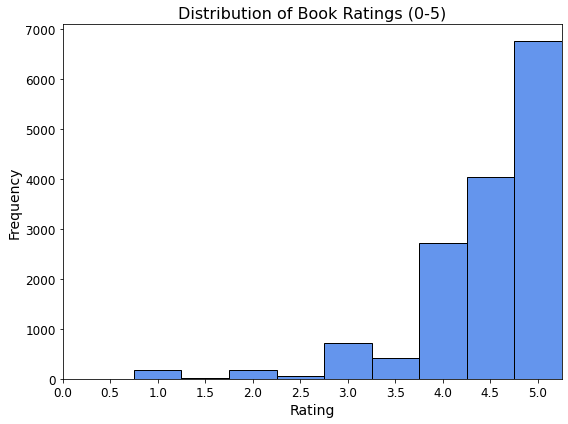

In [357]:
stars = audible['stars'][audible['stars'] != 'NA']

plt.figure(figsize = (8, 6))

bins = np.arange(0.25, 5.5, 0.5) # want bins to be positioned every 0.5 stars

plt.hist(stars, bins = bins, color = 'cornflowerblue', edgecolor = 'black') # using histogram plot

plt.title('Distribution of Book Ratings (0-5)', fontsize = 16)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(np.arange(0, 5.5, 0.5), fontsize = 12) # want xticks to appear in the middle of each bar
plt.yticks(fontsize = 12)
plt.xlim(0, 5.25)
plt.tight_layout()

plt.show()

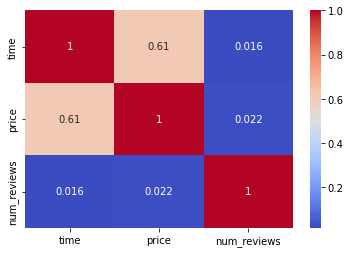

In [372]:
# CORRELATION MATRIX

import seaborn as sns

audible2 = audible # creating a copy of our working dataframe

# applying previously created function to the time duration column for continuous minutes scale
audible2['time'] = audible2['time'].apply(convert_to_minutes)

# print(audible2.head())

corr_matrix = audible2.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

plt.show()